In [130]:
## Importing Libraries

import numpy as np  # Linear algebra operations
import pandas as pd  # Data processing and analysis
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [3]:
## Upload dataset

df = pd.read_csv('/Users/serenaygoler/heart disease.csv')

df.head() # Displays the first 5 rows.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.tail() # Display the last 5 rows.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [8]:
df.info() # Prints name and type of variables, number of observations, and counts of non-missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.shape # Displays the number of rows and columns in the dataset.

(918, 12)

In [12]:
df.isna().sum() # Counts missing values in each column.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
df.duplicated().sum() # Counts the number of duplicate rows.

0

In [16]:
## Provides summary statistics for numeric columns, rounded to 2 decimals and transposed for readability.
df.describe().round(2).T 

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.23,0.42,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.55,0.50,0.0,0.00,1.0,1.0,1.0


In [18]:
# Count how many Cholesterol values are zero
chol_zero_count = (df["Cholesterol"] == 0).sum()

# Count how many RestingBP values are zero
bp_zero_count = (df["RestingBP"] == 0).sum()

print(f"Number of Cholesterol values equal to 0: {chol_zero_count}")
print(f"Number of RestingBP values equal to 0: {bp_zero_count}")

Number of Cholesterol values equal to 0: 172
Number of RestingBP values equal to 0: 1


In [20]:
# Cross-tabulate Cholesterol = 0 with HeartDisease status
import pandas as pd

zero_chol = df[df["Cholesterol"] == 0]
ct = pd.crosstab(zero_chol["HeartDisease"], zero_chol["Cholesterol"])
print(ct)

Cholesterol     0
HeartDisease     
0              20
1             152


In [22]:
## Filters out rows where Cholesterol equals zero and returns summary statistics for the remaining valid values. 

print(df[df["Cholesterol"] != 0]["Cholesterol"].describe()) 

count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64


In [24]:
# With zeros included
print("=== With Zero values Included ===")
print(df.groupby("HeartDisease")["Cholesterol"].describe())

# Zeros removed
print("\n===  With zero values removed ===")
print(df[df["Cholesterol"] != 0].groupby("HeartDisease")["Cholesterol"].describe())

=== With Zero values Included ===
              count        mean         std  min     25%    50%     75%    max
HeartDisease                                                                  
0             410.0  227.121951   74.634659  0.0  197.25  227.0  266.75  564.0
1             508.0  175.940945  126.391398  0.0    0.00  217.0  267.00  603.0

===  With zero values removed ===
              count        mean        std    min    25%    50%     75%    max
HeartDisease                                                                  
0             390.0  238.769231  55.394617   85.0  203.0  231.5  269.00  564.0
1             356.0  251.061798  62.462713  100.0  212.0  246.0  283.25  603.0


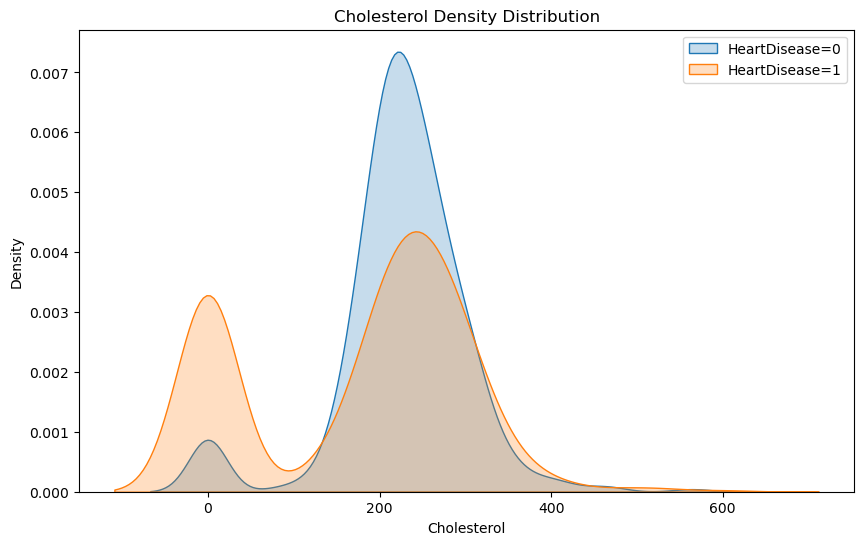

In [26]:
# Plot the cholesterol distribution for HeartDisease=0 and HeartDisease=1 using KDE plots
plt.figure(figsize=(10,6))
sns.kdeplot(df[df["HeartDisease"]==0]["Cholesterol"], label="HeartDisease=0", fill=True)
sns.kdeplot(df[df["HeartDisease"]==1]["Cholesterol"], label="HeartDisease=1", fill=True)
plt.legend()
plt.title("Cholesterol Density Distribution")
plt.show()

In [28]:
# This block cleans the dataset by:
# 1. Removing rows where RestingBP = 0 (unrealistic values).
# 2. Calculating group-wise medians of Cholesterol (by HeartDisease) excluding zeros.
# 3. Replacing Cholesterol values of zero with the corresponding group median.
# 4. Checking that no zero values remain.
# 5. Displaying summary statistics of Cholesterol by HeartDisease after cleaning.

df_clean = df.copy()
df_clean = df_clean[df_clean["RestingBP"] != 0].copy()

medians = (
    df_clean[df_clean["Cholesterol"] != 0]
    .groupby("HeartDisease")["Cholesterol"]
    .median()
)

mask_zero = df_clean["Cholesterol"] == 0
df_clean["Cholesterol"] = df_clean["Cholesterol"].astype(float)
df_clean.loc[mask_zero, "Cholesterol"] = (
    df_clean.loc[mask_zero, "HeartDisease"].map(medians)
)

print("Remaining zeros:", (df_clean["Cholesterol"] == 0).sum())
print(df_clean.groupby("HeartDisease")["Cholesterol"].describe())

Remaining zeros: 0
              count        mean        std    min    25%    50%     75%    max
HeartDisease                                                                  
0             410.0  238.414634  54.045994   85.0  204.0  231.5  266.75  564.0
1             507.0  249.554241  52.370323  100.0  225.0  246.0  267.00  603.0


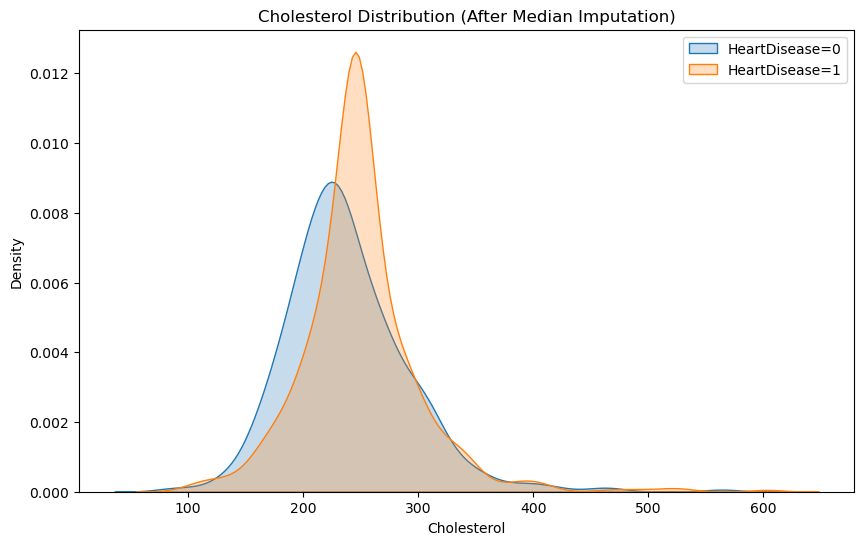

In [30]:
# KDE plot – distribution comparison after median imputation
plt.figure(figsize=(10,6))
sns.kdeplot(df_clean[df_clean["HeartDisease"]==0]["Cholesterol"], label="HeartDisease=0", fill=True)
sns.kdeplot(df_clean[df_clean["HeartDisease"]==1]["Cholesterol"], label="HeartDisease=1", fill=True)
plt.title("Cholesterol Distribution (After Median Imputation)")
plt.xlabel("Cholesterol")
plt.ylabel("Density")
plt.legend()
plt.show()

In [32]:
## Provides summary statistics for numeric columns for clean data, rounded to 2 decimals and transposed for readability.
df_clean.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.51,9.44,28.0,47.0,54.0,60.0,77.0
RestingBP,917.0,132.54,18.00,80.0,120.0,130.0,140.0,200.0
Cholesterol,917.0,244.57,53.39,85.0,214.0,246.0,267.0,603.0
FastingBS,917.0,0.23,0.42,0.0,0.0,0.0,0.0,1.0
MaxHR,917.0,136.79,25.47,60.0,120.0,138.0,156.0,202.0
Oldpeak,917.0,0.89,1.07,-2.6,0.0,0.6,1.5,6.2
HeartDisease,917.0,0.55,0.50,0.0,0.0,1.0,1.0,1.0


In [34]:
# Count negative Oldpeak values

neg_oldpeak_count = (df["Oldpeak"] < 0).sum()
print(f"Number of negative Oldpeak values: {neg_oldpeak_count}")

Number of negative Oldpeak values: 13


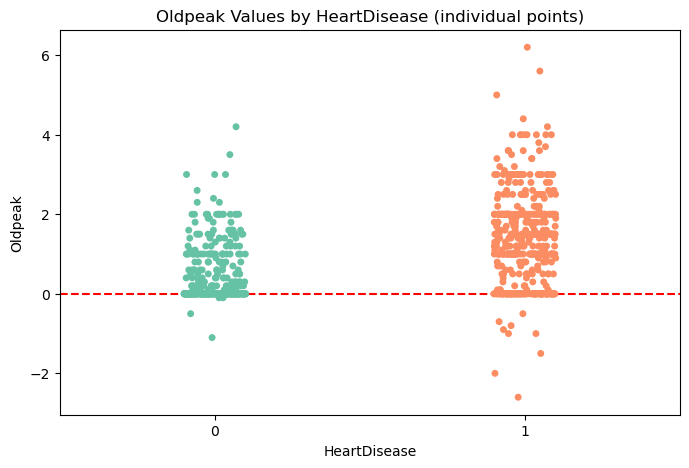

In [36]:
# Stripplot showing distribution of Oldpeak values by HeartDisease, with reference line at 0

plt.figure(figsize=(8,5))
sns.stripplot(x="HeartDisease", y="Oldpeak", data=df, jitter=True, palette="Set2")
plt.axhline(0, color="red", linestyle="--")
plt.title("Oldpeak Values by HeartDisease (individual points)")
plt.show()

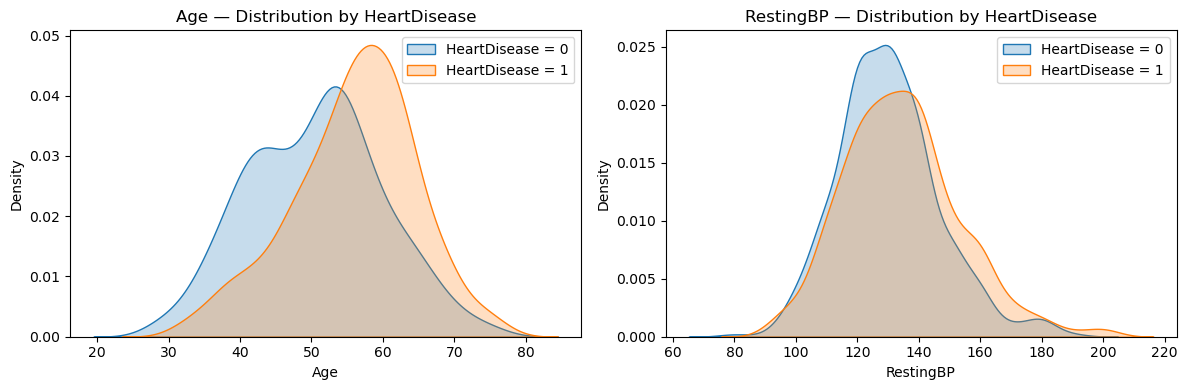

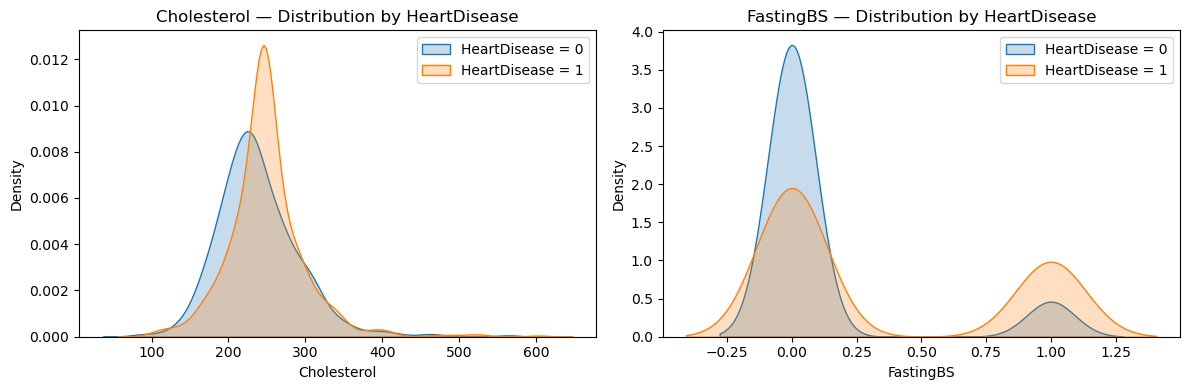

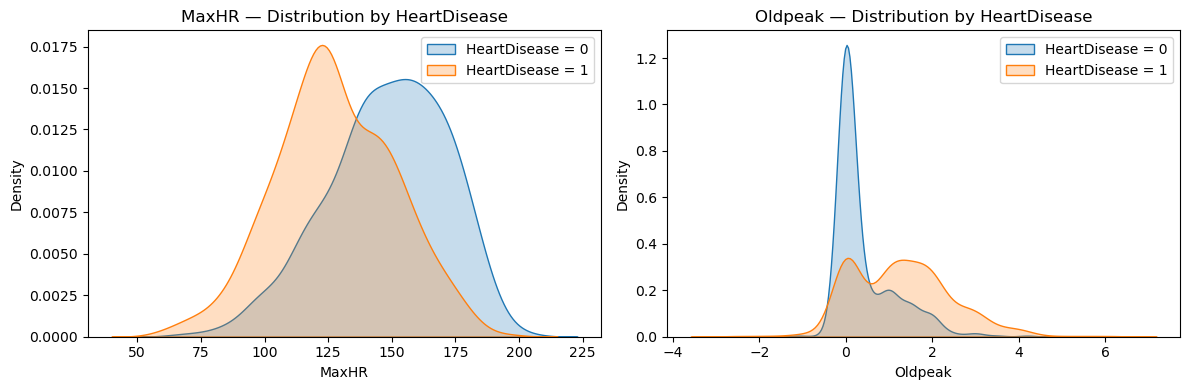

In [38]:
# Plot numeric feature distributions by target, two-at-a-time
num_cols = df_clean.select_dtypes(include="number").columns.drop("HeartDisease")
cols = list(num_cols)

for i in range(0, len(cols), 2):
    pair = cols[i:i+2]  # up to 2 columns per figure

    fig, axes = plt.subplots(1, len(pair), figsize=(12, 4))
    if len(pair) == 1:
        axes = [axes]  # make iterable if only one axis

    for ax, col in zip(axes, pair):
        sns.kdeplot(
            df_clean.loc[df_clean["HeartDisease"] == 0, col].dropna(),
            label="HeartDisease = 0", fill=True, ax=ax
        )
        sns.kdeplot(
            df_clean.loc[df_clean["HeartDisease"] == 1, col].dropna(),
            label="HeartDisease = 1", fill=True, ax=ax
        )
        ax.set_title(f"{col} — Distribution by HeartDisease")
        ax.set_xlabel(col); ax.set_ylabel("Density")
        ax.legend()
        
        

    plt.tight_layout()
    plt.show()

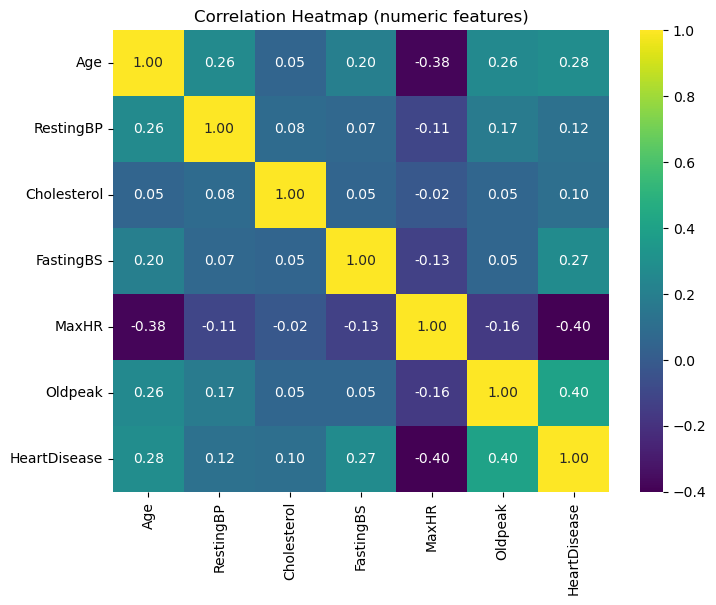

In [40]:
# Select only numerical columns and to check correlation
num_cols = df_clean.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(8,6))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap (numeric features)")
plt.show()

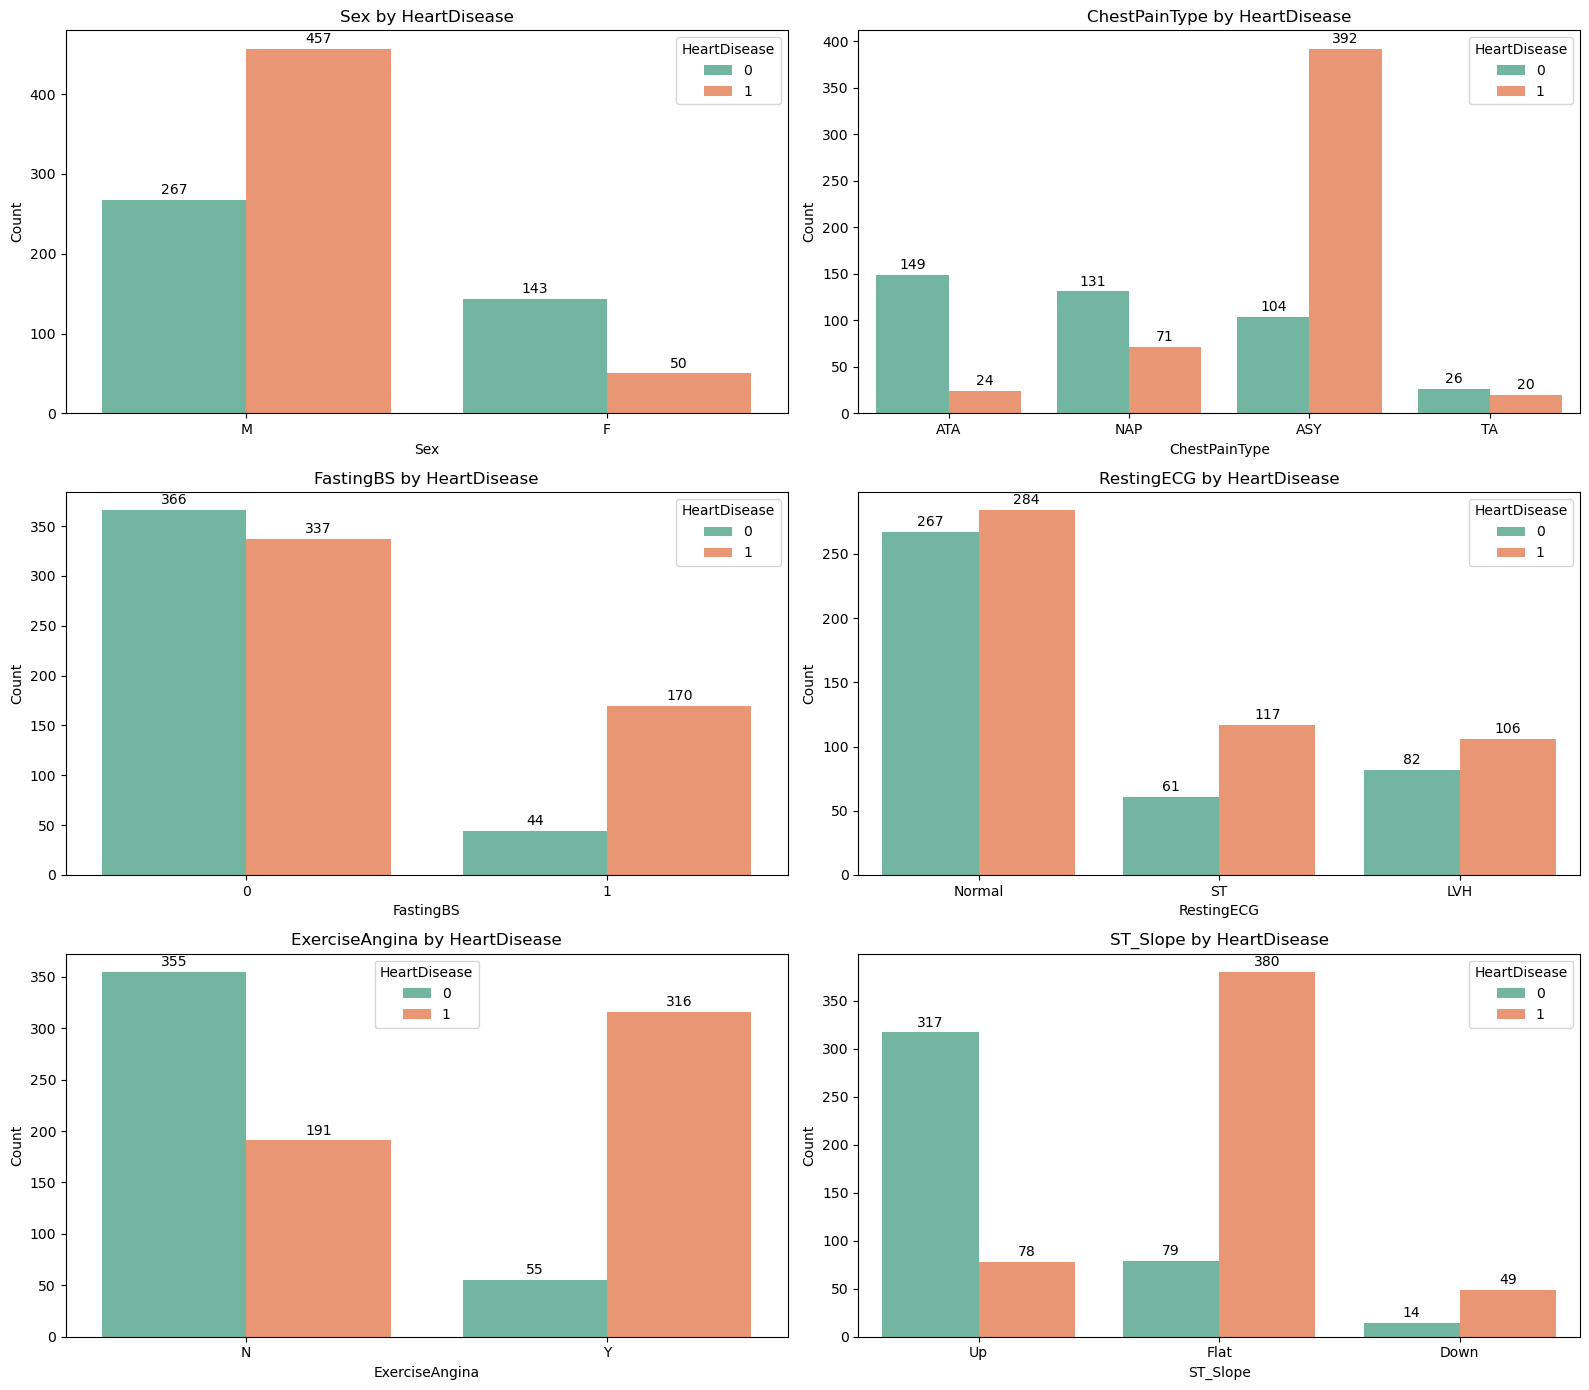

In [42]:
# Distribution of categorical variables by the target variable
cat_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]  # Excluding the target
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 14))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    g = sns.countplot(data=df_clean, x=col, hue="HeartDisease", palette="Set2", ax=ax, dodge=True)
    ax.set_title(f"{col} by HeartDisease")
    ax.set_xlabel(col); ax.set_ylabel("Count")
    # label name
    for c in g.containers:
        g.bar_label(c, padding=2, fmt="%.0f")
        
# Remove extra axes 
for ax in axes[len(cat_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [44]:
# One-hot encoding was applied to transform categorical variables into dummy variables for analysis
DUMMY = pd.get_dummies(df_clean, drop_first=True)
DUMMY.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


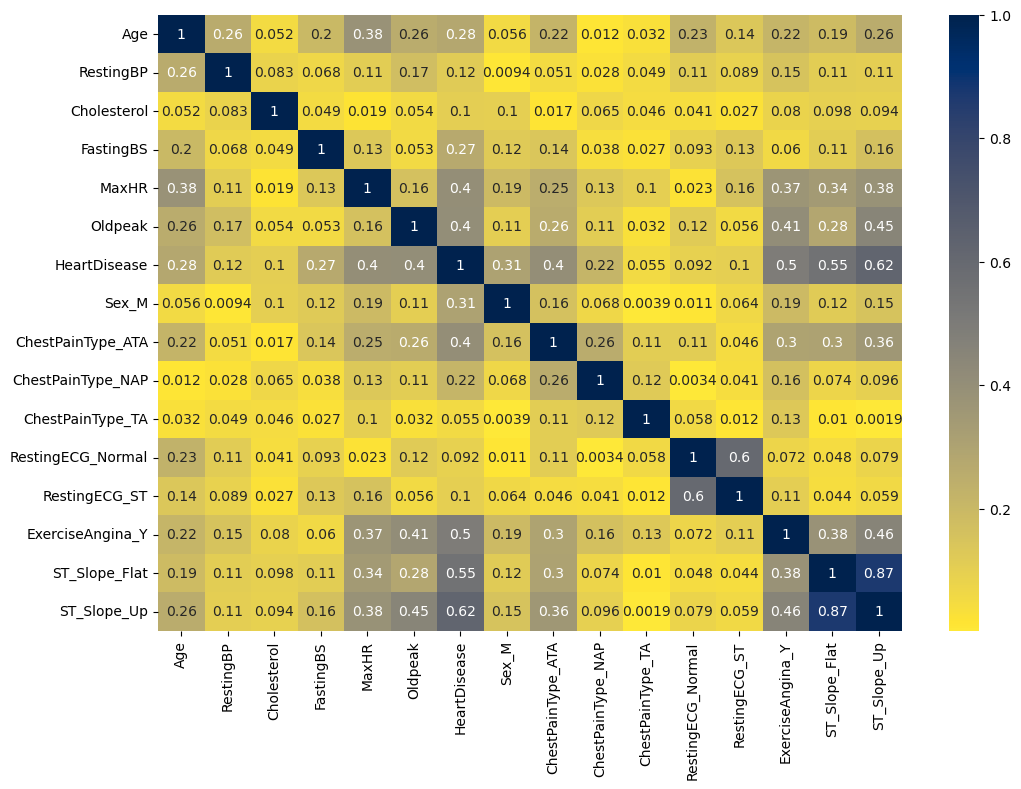

In [46]:
## Compute absolute pairwise correlations (after one-hot encoding) and visualize them with a heatmap
correlations = abs(DUMMY.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="cividis_r")
plt.show()

In [48]:
# Create a copy of the cleaned dataset
codedf = df_clean.copy()

# 1) Convert binary categorical columns into 0/1 format
if codedf['Sex'].dtype == 'object':
    codedf['Sex'] = codedf['Sex'].str.strip().map({'F': 0, 'M': 1}).astype('Int64')

if codedf['ExerciseAngina'].dtype == 'object':
    codedf['ExerciseAngina'] = codedf['ExerciseAngina'].str.strip().map({'N': 0, 'Y': 1}).astype('Int64')

# (If they are already boolean True/False, convert them to integers)
for col in ['Sex', 'ExerciseAngina']:
    if codedf[col].dtype == 'bool':
        codedf[col] = codedf[col].astype(int)

# 2) Apply one-hot encoding for multi-class categorical columns
to_onehot = ['ChestPainType', 'RestingECG', 'ST_Slope']
codedf = pd.get_dummies(codedf, columns=to_onehot, drop_first=True)

# Convert any remaining boolean columns into 0/1 integers
for col in codedf.select_dtypes(include='bool').columns:
    codedf[col] = codedf[col].astype(int)
    
codedf.dtypes

Age                    int64
Sex                    Int64
RestingBP              int64
Cholesterol          float64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         Int64
Oldpeak              float64
HeartDisease           int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
RestingECG_Normal      int64
RestingECG_ST          int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
dtype: object

In [50]:
# Standardize continuous variables (mean = 0, std = 1) 
# This ensures that all numeric predictors are on the same scale, 
# which is especially important for distance-based algorithms (e.g., KNN, SVM).
numcolsc = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
scaler = StandardScaler()
codedf[numcolsc] = scaler.fit_transform(codedf[numcolsc])

codedf.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.432206,1,0.414627,0.832639,0,1.383339,0,-0.831502,0,1,0,0,1,0,0,1
1,-0.478057,0,1.526360,-1.210238,0,0.754736,0,0.106251,1,0,1,0,1,0,1,0
2,-1.750256,1,-0.141240,0.720187,0,-1.523953,0,-0.831502,0,1,0,0,0,1,0,1
3,-0.584074,0,0.303453,-0.573010,0,-1.131075,1,0.575128,1,0,0,0,1,0,1,0
4,0.052026,1,0.970493,-0.929108,0,-0.581047,0,-0.831502,0,0,1,0,1,0,0,1


## Machine Learning

In [53]:
# Split the dataset into features (X) and target (y)
X = codedf.drop(columns=["HeartDisease"])
y = codedf["HeartDisease"]

# Train-test split: 80% training, 20% testing
# Stratify ensures the target class distribution (0/1) is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [55]:
X_test.shape , y_test.shape # Check the shape of the test sets

((184, 15), (184,))

### Logistic Regression

In [58]:
# Logistic Regression Model
# max_iter=1000 ensures convergence during optimization
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy of the model
logregAcc = accuracy_score(y_test, y_pred)
logregAcc

0.8858695652173914

In [60]:
# Generate a detailed classification report
# Includes precision, recall, f1-score, and support for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict probabilities for the positive class (1 = Heart Disease)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score to evaluate the model's discriminative ability
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

ROC AUC: 0.9423720707795313


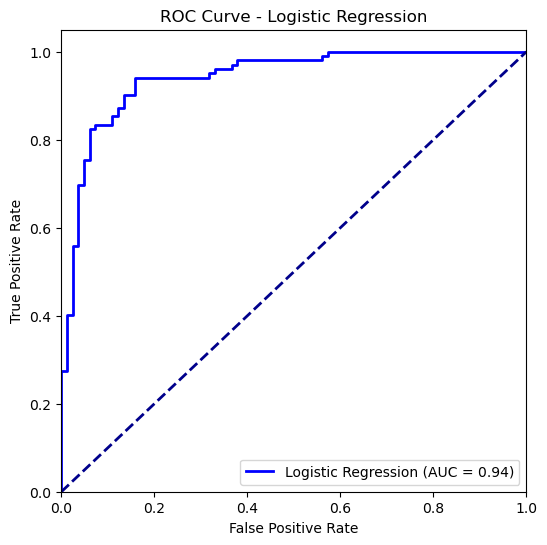

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probability predictions for positive class
y_proba = logreg.predict_proba(X_test)[:,1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# ROC curve plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

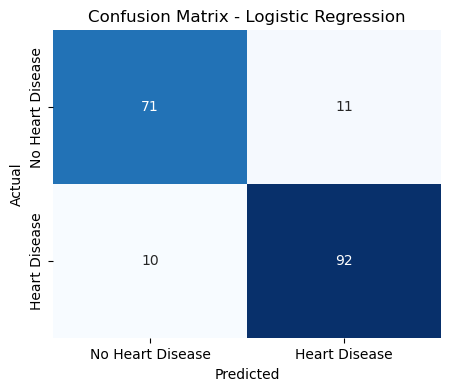

In [64]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease','Heart Disease'],
            yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [66]:
# Create a dataframe of Logistic Regression coefficients
# This shows the direction (+/-) and relative magnitude of each feature's effect
# Positive coefficients → increase likelihood of heart disease
# Negative coefficients → decrease likelihood of heart disease

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
1,Sex,1.358389
4,FastingBS,1.156245
13,ST_Slope_Flat,0.948000
6,ExerciseAngina,0.828883
7,Oldpeak,0.322847
3,Cholesterol,0.074785
0,Age,0.039656
2,RestingBP,-0.008738
12,RestingECG_ST,-0.173987
5,MaxHR,-0.268010


### SUPPORT VECTOR MACHINE

In [69]:
# Linear SVM
svm_linear = SVC(kernel="linear", probability=True, random_state=1)
svm_linear.fit(X_train, y_train)
svm_linearAcc = accuracy_score(y_test, svm_linear.predict(X_test))
print("Linear SVM Accuracy:", svm_linearAcc)

# RBF SVM (non-linear)
svm_rbf = SVC(kernel="rbf", probability=True, random_state=1)
svm_rbf.fit(X_train, y_train)
svm_rbfAcc = accuracy_score(y_test, svm_rbf.predict(X_test))
print("RBF SVM Accuracy:", svm_rbfAcc)

Linear SVM Accuracy: 0.8586956521739131
RBF SVM Accuracy: 0.8858695652173914


In [71]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Note:
# The ROC curve and confusion matrix visuals are not repeated here for SVM,
# as their performance and outputs were nearly identical to Logistic Regression.


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



### DECISION TREE

In [74]:
# Build and train a Decision Tree model
clf = tree.DecisionTreeClassifier(random_state=0)  # reproducibility ensured with random_state
clf.fit(X_train, y_train)  # fit the model to training data

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy on the test set
clfAcc = accuracy_score(y_test, y_pred)
clfAcc

0.7663043478260869

In [76]:
# Print classification metrics and ROC AUC for the Decision Tree
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict probabilities for the positive class (heart disease = 1)
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculate and print ROC AUC score
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74        82
           1       0.79      0.78      0.79       102

    accuracy                           0.77       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.77      0.77      0.77       184

ROC AUC: 0.7641080822572931


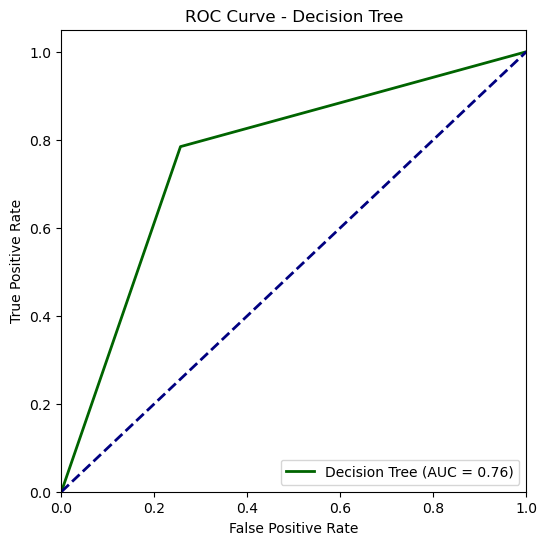

ROC AUC (Decision Tree): 0.7641080822572931


In [78]:
# Predict probability estimates for the positive class (heart disease = 1)
y_proba_tree = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba_tree)

# Calculate AUC (Area Under the Curve)
roc_auc_tree = roc_auc_score(y_test, y_proba_tree)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2,
         label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Print final AUC value
print("ROC AUC (Decision Tree):", roc_auc_tree)

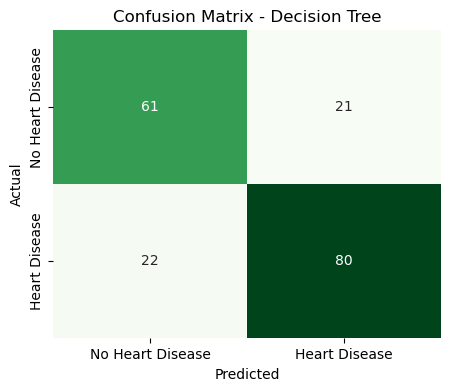

In [80]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['No Heart Disease','Heart Disease'],
            yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### RANDOM FOREST 

In [83]:
# 1) Build and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2) Predictions on the test set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # probability for the positive class (heart disease = 1)

# 3) Evaluation
rfAcc = accuracy_score(y_test, y_pred)          # store accuracy
roc_auc_rf = roc_auc_score(y_test, y_proba)     # store AUC
report = classification_report(y_test, y_pred) # precision/recall/F1 per class

print("Random Forest Accuracy:", rfAcc)
print("\nClassification Report:\n", report)
print("ROC AUC:", roc_auc_rf)

Random Forest Accuracy: 0.8804347826086957

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

ROC AUC: 0.93824725011956


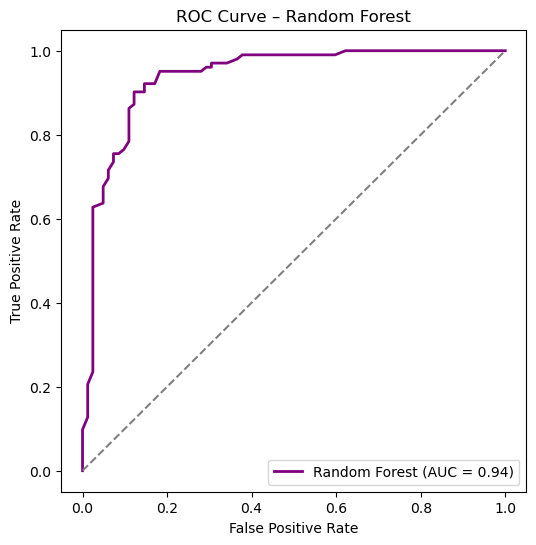

In [85]:
# ROC Curve for Random Forest

y_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="purple", lw=2, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest"); plt.legend(loc="lower right")
plt.show()

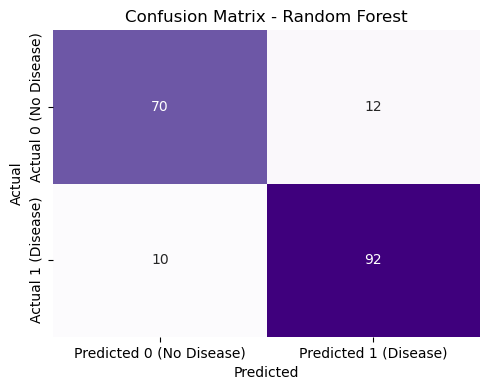

In [87]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["Predicted 0 (No Disease)", "Predicted 1 (Disease)"],
            yticklabels=["Actual 0 (No Disease)", "Actual 1 (Disease)"])

plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

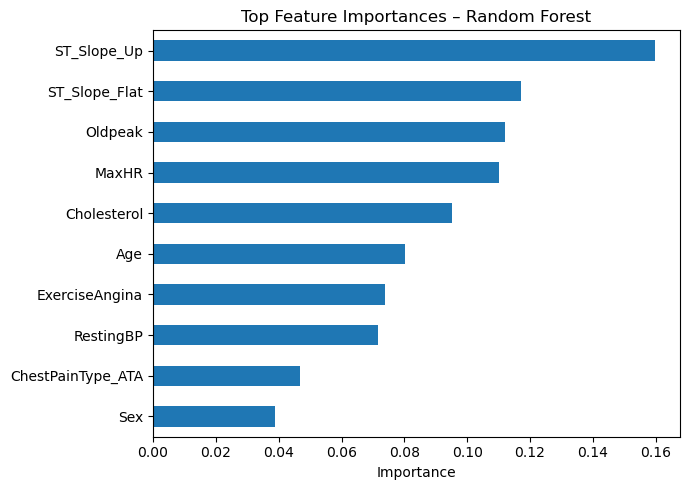

In [89]:
# Extract and sort feature importances from the trained Random Forest model
fi = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()

# Select the top 10 most important features
top = fi.tail(10)

# Plot horizontal bar chart of feature importances
plt.figure(figsize=(7,5))
top.plot(kind="barh")
plt.title("Top Feature Importances – Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

### KNN

In [92]:
# Define the range of k values to test
k_values = range(1, 21)
cv_scores = []

# Loop through each k and perform 5-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Identify the k with the highest mean accuracy
best_k = k_values[cv_scores.index(max(cv_scores))]

print("Best k:", best_k)

Best k: 10


In [94]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knnAcc = accuracy_score(y_test,y_pred)
knnAcc

0.8695652173913043

In [96]:
# Generate probability predictions for the positive class
y_proba = knn.predict_proba(X_test)[:, 1]

# Evaluate the model with ROC AUC and classification report
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC AUC: 0.9324485891917742

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        82
           1       0.91      0.85      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



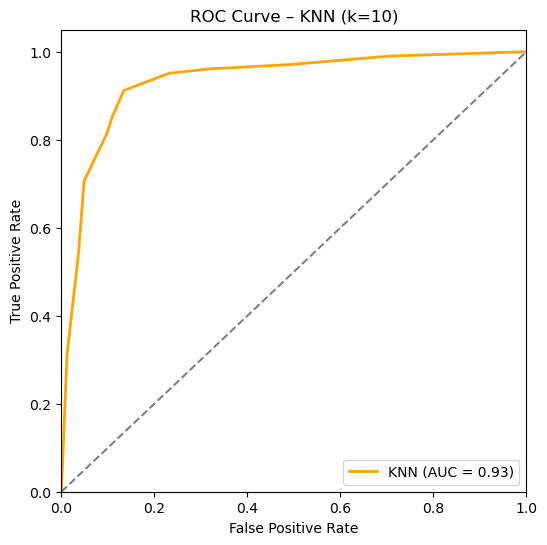

In [98]:
# Probability predictions for the positive class
y_proba_knn = knn.predict_proba(X_test)[:, 1]

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='orange', lw=2, label="KNN (AUC = %0.2f)" % auc_knn)
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN (k=10)")
plt.legend(loc="lower right")
plt.show()


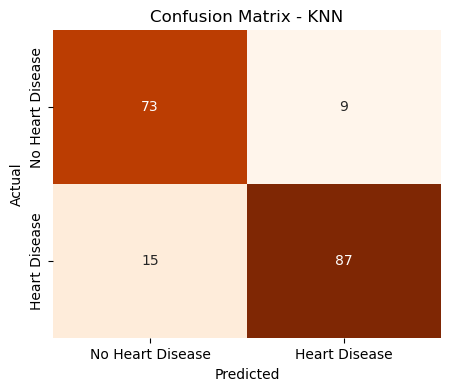

In [100]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['No Heart Disease','Heart Disease'],
            yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

### GRADIENT BOOSTING CLASSIFIER

Gradient Boosting Accuracy: 0.907608695652174
Gradient Boosting ROC AUC: 0.9549258727881397

Classification Report (GBoost):
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        82
           1       0.93      0.90      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

Confusion Matrix (GBoost):
 [[75  7]
 [10 92]]


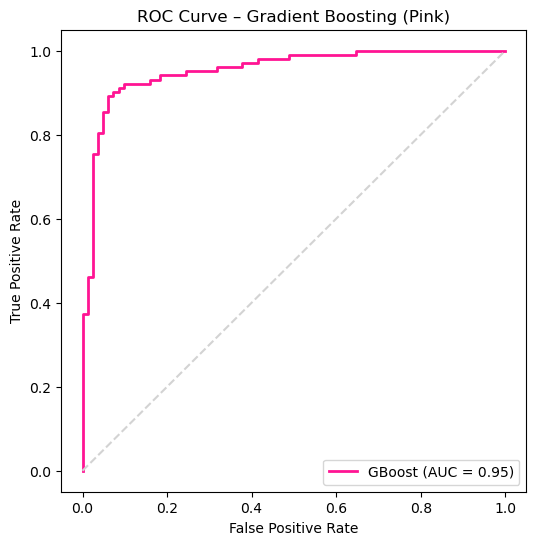

In [103]:
# 1) Train
gboost = GradientBoostingClassifier(
    random_state=42,      # reproducibility
    learning_rate=0.05,   # mild shrinkage
    n_estimators=300,     # a bit larger to stabilize
    max_depth=2           # shallow trees (prevents overfitting on small data)
)
gboost.fit(X_train, y_train)

# 2) Predict class labels and probabilities
y_pred_gb = gboost.predict(X_test)
y_proba_gb = gboost.predict_proba(X_test)[:, 1]

# 3) Metrics (keep them all!)
gboostAcc = accuracy_score(y_test, y_pred_gb)
gboostAUC = roc_auc_score(y_test, y_proba_gb)

print("Gradient Boosting Accuracy:", gboostAcc)
print("Gradient Boosting ROC AUC:", gboostAUC)
print("\nClassification Report (GBoost):\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix (GBoost):\n", confusion_matrix(y_test, y_pred_gb))  # sadece yazı, görsel yok

# 4) ROC curve 
fpr, tpr, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, color="deeppink", 
         label=f"GBoost (AUC = {gboostAUC:.2f})")
plt.plot([0,1], [0,1], '--', color='lightgray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Gradient Boosting (Pink)")
plt.legend(loc="lower right")
plt.show()

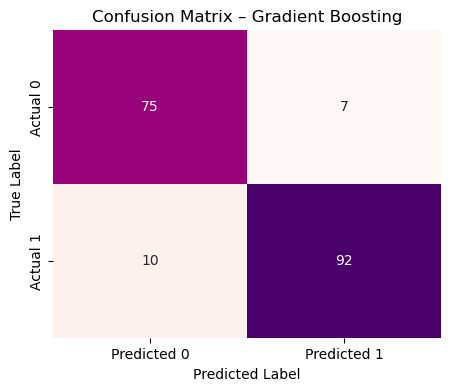

In [105]:
# --- Confusion Matrix Visualization for GBoost (Pink tones) ---
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix – Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              Feature  Importance
14        ST_Slope_Up    0.513421
3         Cholesterol    0.084141
7             Oldpeak    0.082765
6      ExerciseAngina    0.065509
5               MaxHR    0.056675
1                 Sex    0.047185
8   ChestPainType_ATA    0.034654
9   ChestPainType_NAP    0.034181
2           RestingBP    0.025429
4           FastingBS    0.018967
10   ChestPainType_TA    0.013954
0                 Age    0.012171
13      ST_Slope_Flat    0.007031
11  RestingECG_Normal    0.003777
12      RestingECG_ST    0.000138


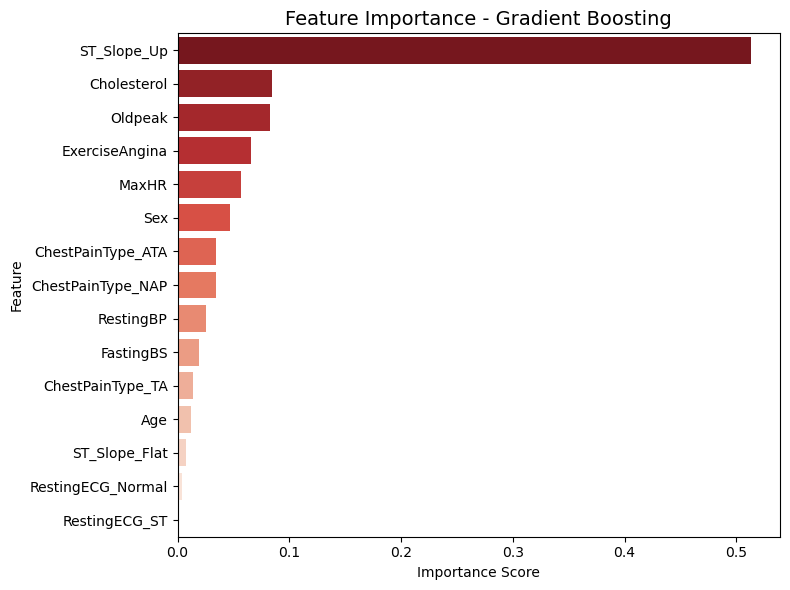

In [107]:
# 1) Get feature importances from trained Gradient Boosting model
importances = gboost.feature_importances_

# 2) Put into a DataFrame with feature names
feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp)

# 3) Plot feature importance (bar chart)
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="Reds_r")
plt.title("Feature Importance - Gradient Boosting", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### NAIVE BAYES (GAUSSIAN)

Naive Bayes (Gaussian) Accuracy: 0.8913043478260869
Naive Bayes (Gaussian) ROC AUC: 0.9404591104734578

Classification Report (GaussianNB):
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        82
           1       0.91      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



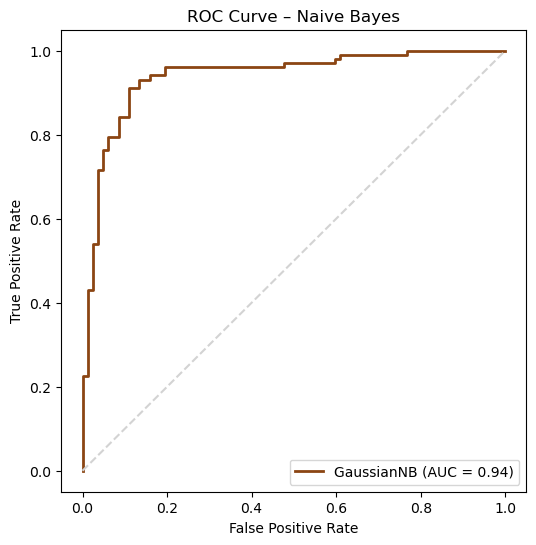

In [110]:
# 1) Train
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 2) Predict
y_pred_nb = gnb.predict(X_test)
y_proba_nb = gnb.predict_proba(X_test)[:, 1]

# 3) Metrics (keep report & metrics, drop confusion matrix numbers)
nbAcc = accuracy_score(y_test, y_pred_nb)
nbAUC = roc_auc_score(y_test, y_proba_nb)

print("Naive Bayes (Gaussian) Accuracy:", nbAcc)
print("Naive Bayes (Gaussian) ROC AUC:", nbAUC)
print("\nClassification Report (GaussianNB):\n", classification_report(y_test, y_pred_nb))

# 4) ROC curve (brown tones)
fpr, tpr, _ = roc_curve(y_test, y_proba_nb)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, color="saddlebrown", 
         label=f"GaussianNB (AUC = {nbAUC:.2f})")
plt.plot([0,1], [0,1], '--', color='lightgray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Naive Bayes")
plt.legend(loc="lower right")
plt.show()

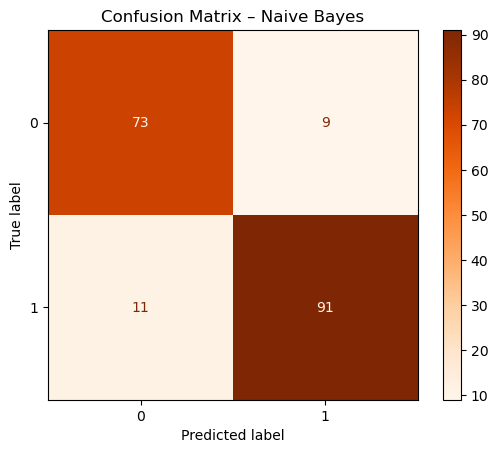

In [112]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Oranges") 
plt.title("Confusion Matrix – Naive Bayes")
plt.show()

                 Model  Accuracy  Precision  Recall  F1-score  ROC AUC
0  Logistic Regression      0.89       0.89    0.90      0.90     0.94
1        Random Forest      0.88       0.88    0.90      0.89     0.94
2           KNN (k=10)      0.87       0.91    0.85      0.88     0.93
3            SVM (RBF)      0.89       0.89    0.90      0.90     0.94
4        Decision Tree      0.77       0.79    0.78      0.78     0.76
5    Gradient Boosting      0.91       0.93    0.90      0.92     0.95
6          Naive Bayes      0.89       0.91    0.89      0.90     0.94


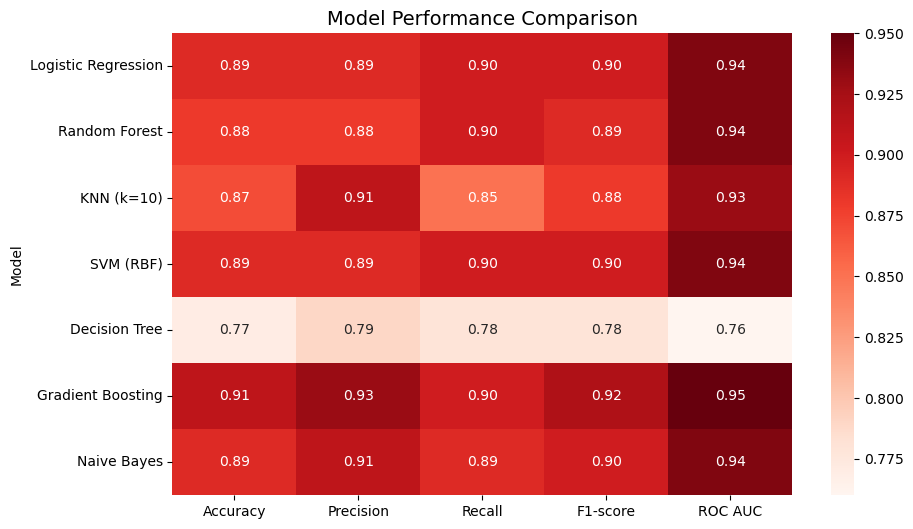

In [114]:
# Step 1: Create a dictionary with model performance results
data = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "KNN (k=10)",
        "SVM (RBF)",
        "Decision Tree",
        "Gradient Boosting",
        "Naive Bayes"
    ],
    "Accuracy": [0.89, 0.88, 0.87, 0.89, 0.77, 0.91, 0.89],
    "Precision": [0.89, 0.88, 0.91, 0.89, 0.79, 0.93, 0.91],
    "Recall": [0.90, 0.90, 0.85, 0.90, 0.78, 0.90, 0.89],
    "F1-score": [0.90, 0.89, 0.88, 0.90, 0.78, 0.92, 0.90],
    "ROC AUC": [0.94, 0.94, 0.93, 0.94, 0.76, 0.95, 0.94]
}

# Step 2: Convert to DataFrame
df_perf = pd.DataFrame(data)

# Step 3: Print table
print(df_perf)

# Step 4: Heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df_perf.set_index("Model"), annot=True, cmap="Reds", fmt=".2f", cbar=True)
plt.title("Model Performance Comparison", fontsize=14)
plt.yticks(rotation=0)
plt.show()

## Deep Learning 

### BASELINE MLP 

In [118]:
# (only Dense layers, no regularization or callbacks)

# (Optional) set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1) Model architecture (very simple)
model_baseline = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")   # output layer for binary classification
])

# 2) Compile the model
#    - Optimizer: Adam
#    - Loss: Binary crossentropy (since target is 0/1)
#    - Metrics: Accuracy and AUC
model_baseline.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

# 3) Training
#    - Uses 20% of the training set for validation (validation_split=0.2)
#    - Trains for 100 epochs with batch size = 32
#    - No early stopping or learning rate scheduling
history_base = model_baseline.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 4) Evaluation on the test set
#    - Predictions are probabilities, converted to class labels at 0.5 threshold
proba_base = model_baseline.predict(X_test).ravel()
y_pred_base = (proba_base >= 0.5).astype(int)

print("Test Accuracy (Baseline MLP):", accuracy_score(y_test, y_pred_base))
print("Test AUC (Baseline MLP):", roc_auc_score(y_test, proba_base))
print("\nClassification Report (Baseline MLP):\n", classification_report(y_test, y_pred_base))
print("Confusion Matrix (Baseline MLP):\n", confusion_matrix(y_test, y_pred_base))

Epoch 1/100


2025-08-29 17:36:05.921806: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-08-29 17:36:05.921903: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-08-29 17:36:05.921924: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-08-29 17:36:05.921975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-29 17:36:05.922011: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-08-29 17:36:06.229703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-08-29 17:36:06.230842:

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5853 - auc: 0.7332 - loss: 0.6408 - val_accuracy: 0.6871 - val_auc: 0.8036 - val_loss: 0.6008
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7474 - auc: 0.8732 - loss: 0.5550 - val_accuracy: 0.7551 - val_auc: 0.8416 - val_loss: 0.5469
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8242 - auc: 0.8971 - loss: 0.4898 - val_accuracy: 0.7755 - val_auc: 0.8423 - val_loss: 0.5074
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8464 - auc: 0.9060 - loss: 0.4382 - val_accuracy: 0.8027 - val_auc: 0.8471 - val_loss: 0.4823
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8567 - auc: 0.9121 - loss: 0.4011 - val_accuracy: 0.8095 - val_auc: 0.8495 - val_loss: 0.4678
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8618 - auc: 0.9171 - loss: 0.3761 - val_accuracy: 0.8095 - val_auc: 0.8537 - val_loss: 0.4601
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

###  Enhanced MLP

In [120]:
# (Optional) ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1) Define a simple MLP architecture for binary classification
#    - Hidden layers use ReLU to capture non-linearities
#    - BatchNorm + Dropout help stabilize training and reduce overfitting
#    - Output layer is a single neuron with Sigmoid to output P(y=1)
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")  # binary classification output (probability)
])

# 2) Compile the model
#    - Binary cross-entropy is the standard loss for 0/1 targets
#    - Track both Accuracy and AUC (discrimination)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

# 3) Callbacks to improve training stability
#    - EarlyStopping: stop when val_loss stops improving; restore best weights
#    - ReduceLROnPlateau: reduce learning rate when val_loss plateaus
early = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
plateau = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-5)

# 4) Train the model
#    - validation_split=0.2: uses 20% of the TRAINING set as validation
#      (test set remains untouched for final evaluation)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early, plateau],
    verbose=1
)

# 5) Final evaluation on the held-out test set
#    - proba: predicted probability of the positive class (y=1)
#    - y_pred: hard labels using a default 0.50 threshold
proba = model.predict(X_test).ravel()
y_pred = (proba >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# (Optional) If you want to optimize the decision threshold instead of using 0.50,
# you can compute the ROC curve and pick the Youden J point (argmax of TPR - FPR).
# Then recompute y_pred and the confusion matrix at that threshold.

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5512 - auc: 0.6266 - loss: 0.7772 - val_accuracy: 0.6599 - val_auc: 0.7215 - val_loss: 0.6653 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7014 - auc: 0.8002 - loss: 0.5732 - val_accuracy: 0.7211 - val_auc: 0.8085 - val_loss: 0.6049 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8020 - auc: 0.8790 - loss: 0.4532 - val_accuracy: 0.7755 - val_auc: 0.8312 - val_loss: 0.5646 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8225 - auc: 0.8936 - loss: 0.4173 - val_accuracy: 0.7959 - val_auc: 0.8528 - val_loss: 0.5278 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8311 - auc: 0.8974 - loss: 0.4064 - val_accuracy: 0.8095 - val_auc: 0.8538 - val_loss: 0.5042 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8345 - auc: 0.

### LSTM

In [142]:
# 1) Convert all features to numeric.
#    - If a value cannot be converted, it will be set to NaN.
X_num = X.apply(pd.to_numeric, errors='coerce')

# 2) Handle missing values (NaN).
#    - Here we replace them with 0, but in practice you could also use the median/mean.
X_num = X_num.fillna(0)

# 3) Standardize data types for Keras.
#    - Force all features to float32 (recommended format for neural networks).
X_num = X_num.astype('float32')

# 4) Convert the target variable (y) to numeric as well.
#    - Any non-numeric values are coerced to NaN, then replaced with 0.
#    - Finally, cast to int32 (since this is a classification target).
y_num = pd.to_numeric(y, errors='coerce').fillna(0).astype('int32')

X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0).astype('float32')
X_test  = X_test.apply(pd.to_numeric, errors='coerce').fillna(0).astype('float32')
y_train = pd.to_numeric(y_train, errors='coerce').fillna(0).astype('int32')
y_test  = pd.to_numeric(y_test,  errors='coerce').fillna(0).astype('int32')

print("Object dtype columns in X_train:",
      list(X_train.columns[X_train.dtypes == 'object']))
print("Any NaNs? ->", X_train.isna().any().any(), y_train.isna().any())

n_features = X_train.shape[1]
X_train_seq = np.asarray(X_train, dtype=np.float32).reshape(-1, n_features, 1)
X_test_seq  = np.asarray(X_test,  dtype=np.float32).reshape(-1, n_features, 1)

Object dtype columns in X_train: []
Any NaNs? -> False False


In [152]:
model_lstm = Sequential([
    LSTM(32, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6) Eğit
hist_lstm = model_lstm.fit(
    X_train_seq, y_train,
    epochs=20, batch_size=32,
    validation_split=0.2, verbose=1
)

# 7) Tahmin ve metrikler
proba_lstm = model_lstm.predict(X_test_seq).ravel()
y_pred_lstm = (proba_lstm >= 0.5).astype(int)

# Accuracy ve AUC (bunlar zaten sende var)
print("Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("AUC:", roc_auc_score(y_test, proba_lstm))

# Recall ve F1'i ek import olmadan hesapla (class=1)
cm = confusion_matrix(y_test, y_pred_lstm, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
f1        = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

print("Recall (class=1):", round(recall, 4))
print("F1 (class=1):", round(f1, 4))

# Detaylı rapor ve matris (bunlar da sende var)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm))
print("Confusion Matrix:\n", cm)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5580 - loss: 0.6878 - val_accuracy: 0.5714 - val_loss: 0.6789
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5580 - loss: 0.6695 - val_accuracy: 0.5782 - val_loss: 0.6606
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5956 - loss: 0.6558 - val_accuracy: 0.6122 - val_loss: 0.6503
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6246 - loss: 0.6434 - val_accuracy: 0.6599 - val_loss: 0.6427
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6314 - loss: 0.6317 - val_accuracy: 0.6395 - val_loss: 0.6400
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6365 - loss: 0.6253 - val_accuracy: 0.6395 - val_loss: 0.6356
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6451 - loss: 0.6176 - val_accuracy: 0.6667 - val_loss: 0.6280
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6519 - loss: 0.6068 - val_accuracy: 0.6667 - val_loss

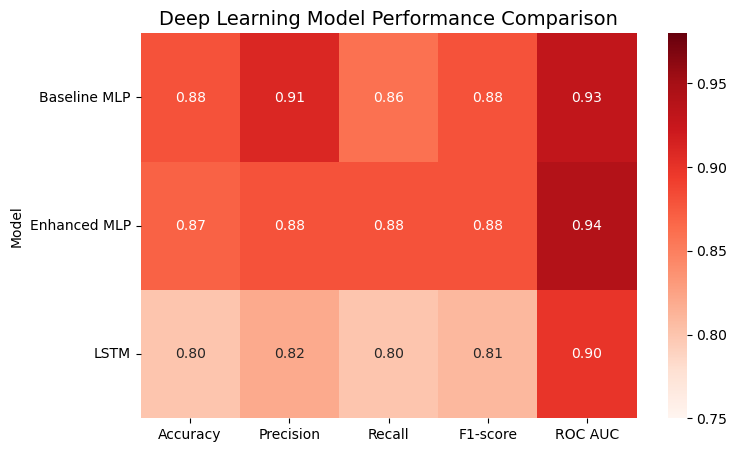

In [156]:
# Deep Learning model performance results
data_dl = {
    "Model": ["Baseline MLP", "Enhanced MLP", "LSTM"],
    "Accuracy": [0.88, 0.87, 0.80],
    "Precision": [0.91, 0.88, 0.82],
    "Recall": [0.86, 0.88, 0.80],
    "F1-score": [0.88, 0.88, 0.81],
    "ROC AUC": [0.93, 0.94, 0.90]
}

# Convert to DataFrame
df_dl = pd.DataFrame(data_dl).set_index("Model")

# Plot heatmap (red tones)
plt.figure(figsize=(8, 5))
sns.heatmap(df_dl, annot=True, fmt=".2f", cmap="Reds", vmin=0.75, vmax=0.98, cbar=True)
plt.title("Deep Learning Model Performance Comparison", fontsize=14)
plt.yticks(rotation=0)
plt.show()

In [158]:
# Deep Learning model performance results 
data_dl = {
    "Model": [
        "Baseline MLP",
        "Enhanced MLP",
        "LSTM"
    ],
    "Accuracy": [0.88, 0.87, 0.80],
    "Precision": [0.91, 0.88, 0.82],
    "Recall": [0.86, 0.88, 0.80],
    "F1-score": [0.88, 0.88, 0.81],
    "ROC AUC": [0.93, 0.94, 0.90]
}

df_dl = pd.DataFrame(data_dl)
print(df_dl)

          Model  Accuracy  Precision  Recall  F1-score  ROC AUC
0  Baseline MLP      0.88       0.91    0.86      0.88     0.93
1  Enhanced MLP      0.87       0.88    0.88      0.88     0.94
2          LSTM      0.80       0.82    0.80      0.81     0.90


# Thank you